# Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

# **Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

In [14]:
import pandas as pd
df =pd.read_csv(r'C:\Users\verus\Downloads\archive (5)\amz_uk_price_prediction_dataset.csv')

# Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

In [7]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [6]:
df[['category','isBestSeller']]

,category,isBestSeller
0,Hi-Fi Speakers,False
1,Hi-Fi Speakers,True
2,Hi-Fi Speakers,False
3,Hi-Fi Speakers,False
4,Hi-Fi Speakers,False
...,...,...
2443646,Motorbike Clothing,False
2443647,Motorbike Clothing,False
2443648,Motorbike Clothing,False
2443649,Motorbike Clothing,False


In [10]:
9008/len(df.query('category == "Grocery"'))

0.9418653283145128

In [11]:
pd.crosstab(df['category'],df['isBestSeller']).sort_values(by=True,ascending=False)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [12]:
crosstab_result = pd.crosstab(df['category'],df['isBestSeller'],normalize='index').sort_values(by=True,ascending=False)
crosstab_result

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
"CD, Disc & Tape Players",1.000000,0.000000
General Music-Making Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000


In [16]:
cross_table=pd.crosstab(df['category'],df['isBestSeller']).sort_values(by=True,ascending=False)
((cross_table[True]/( cross_table.sum(axis=1) )) * 100 )

category
Grocery                        5.813467
Health & Personal Care         5.768628
Baby                           2.265781
Sports & Outdoors              0.039461
Power & Hand Tools             3.533895
                                 ...   
Downhill Ski Boots             0.000000
Digital Frames                 0.000000
Motorbike Chassis              0.000000
Motorbike Drive & Gears        0.000000
eBook Readers & Accessories    0.000000
Length: 296, dtype: float64

In [17]:
cross_table.sum(axis=1)

category
Grocery                          9564
Health & Personal Care           9569
Baby                            15050
Sports & Outdoors              836265
Power & Hand Tools               8659
                                ...  
Downhill Ski Boots               1284
Digital Frames                    774
Motorbike Chassis                 107
Motorbike Drive & Gears           250
eBook Readers & Accessories       246
Length: 296, dtype: int64

In [18]:
from scipy.stats import chi2_contingency

In [20]:
_, chi2_p_value, _, _ = chi2_contingency(cross_table)

chi2_p_value

0.0

In [21]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(cross_table, method="cramer")

0.12228294397605641

<Axes: xlabel='category'>

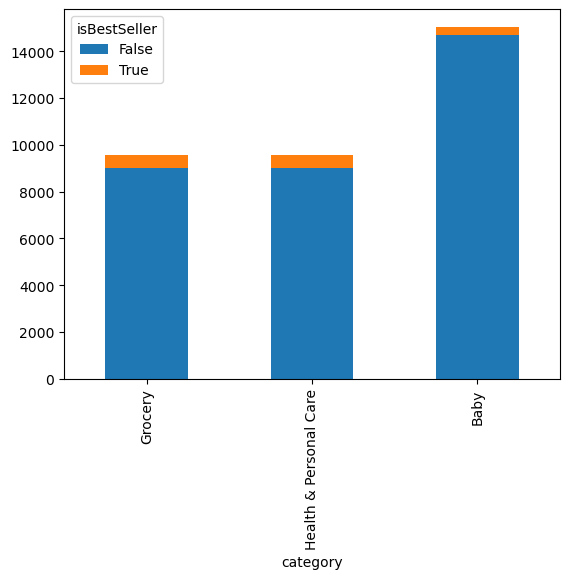

In [22]:
cross_table.head(3).plot(kind='bar',stacked=True)

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

In [23]:
df['price'].skew()

27.492977566280338

<Axes: >

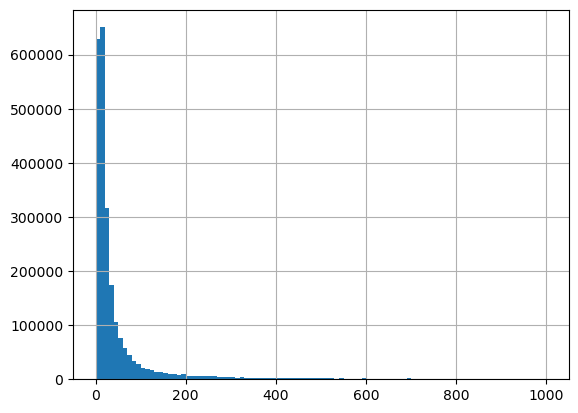

In [24]:
df.query('price<1000')['price'].hist(bins=100)

In [27]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

def tukeys_test_outliers_filter(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR
    
    # Identify the outliers
    return (data < lower_bound) | (data > upper_bound)
    
    

df.loc[~df['price'].isin(tukeys_test_outliers(df['price']))]
df_no_outliers = df.loc[~tukeys_test_outliers_filter(df['price'])]

In [28]:
len(df_no_outliers)/len(df)

0.9270955631552951

In [29]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

def tukeys_test_outliers_filter(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    return (data < lower_bound) | (data > upper_bound)
    
    

df.loc[~df['price'].isin(tukeys_test_outliers(df['price']))]
df_no_outliers = df.loc[~tukeys_test_outliers_filter(df['price'])]

In [30]:
len(df_no_outliers)/len(df)

0.8659022912846392

In [31]:
filtered_categories = df['category'].value_counts().head(10).index
filtered_categories

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances'],
      dtype='object', name='category')

C:\Users\verus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


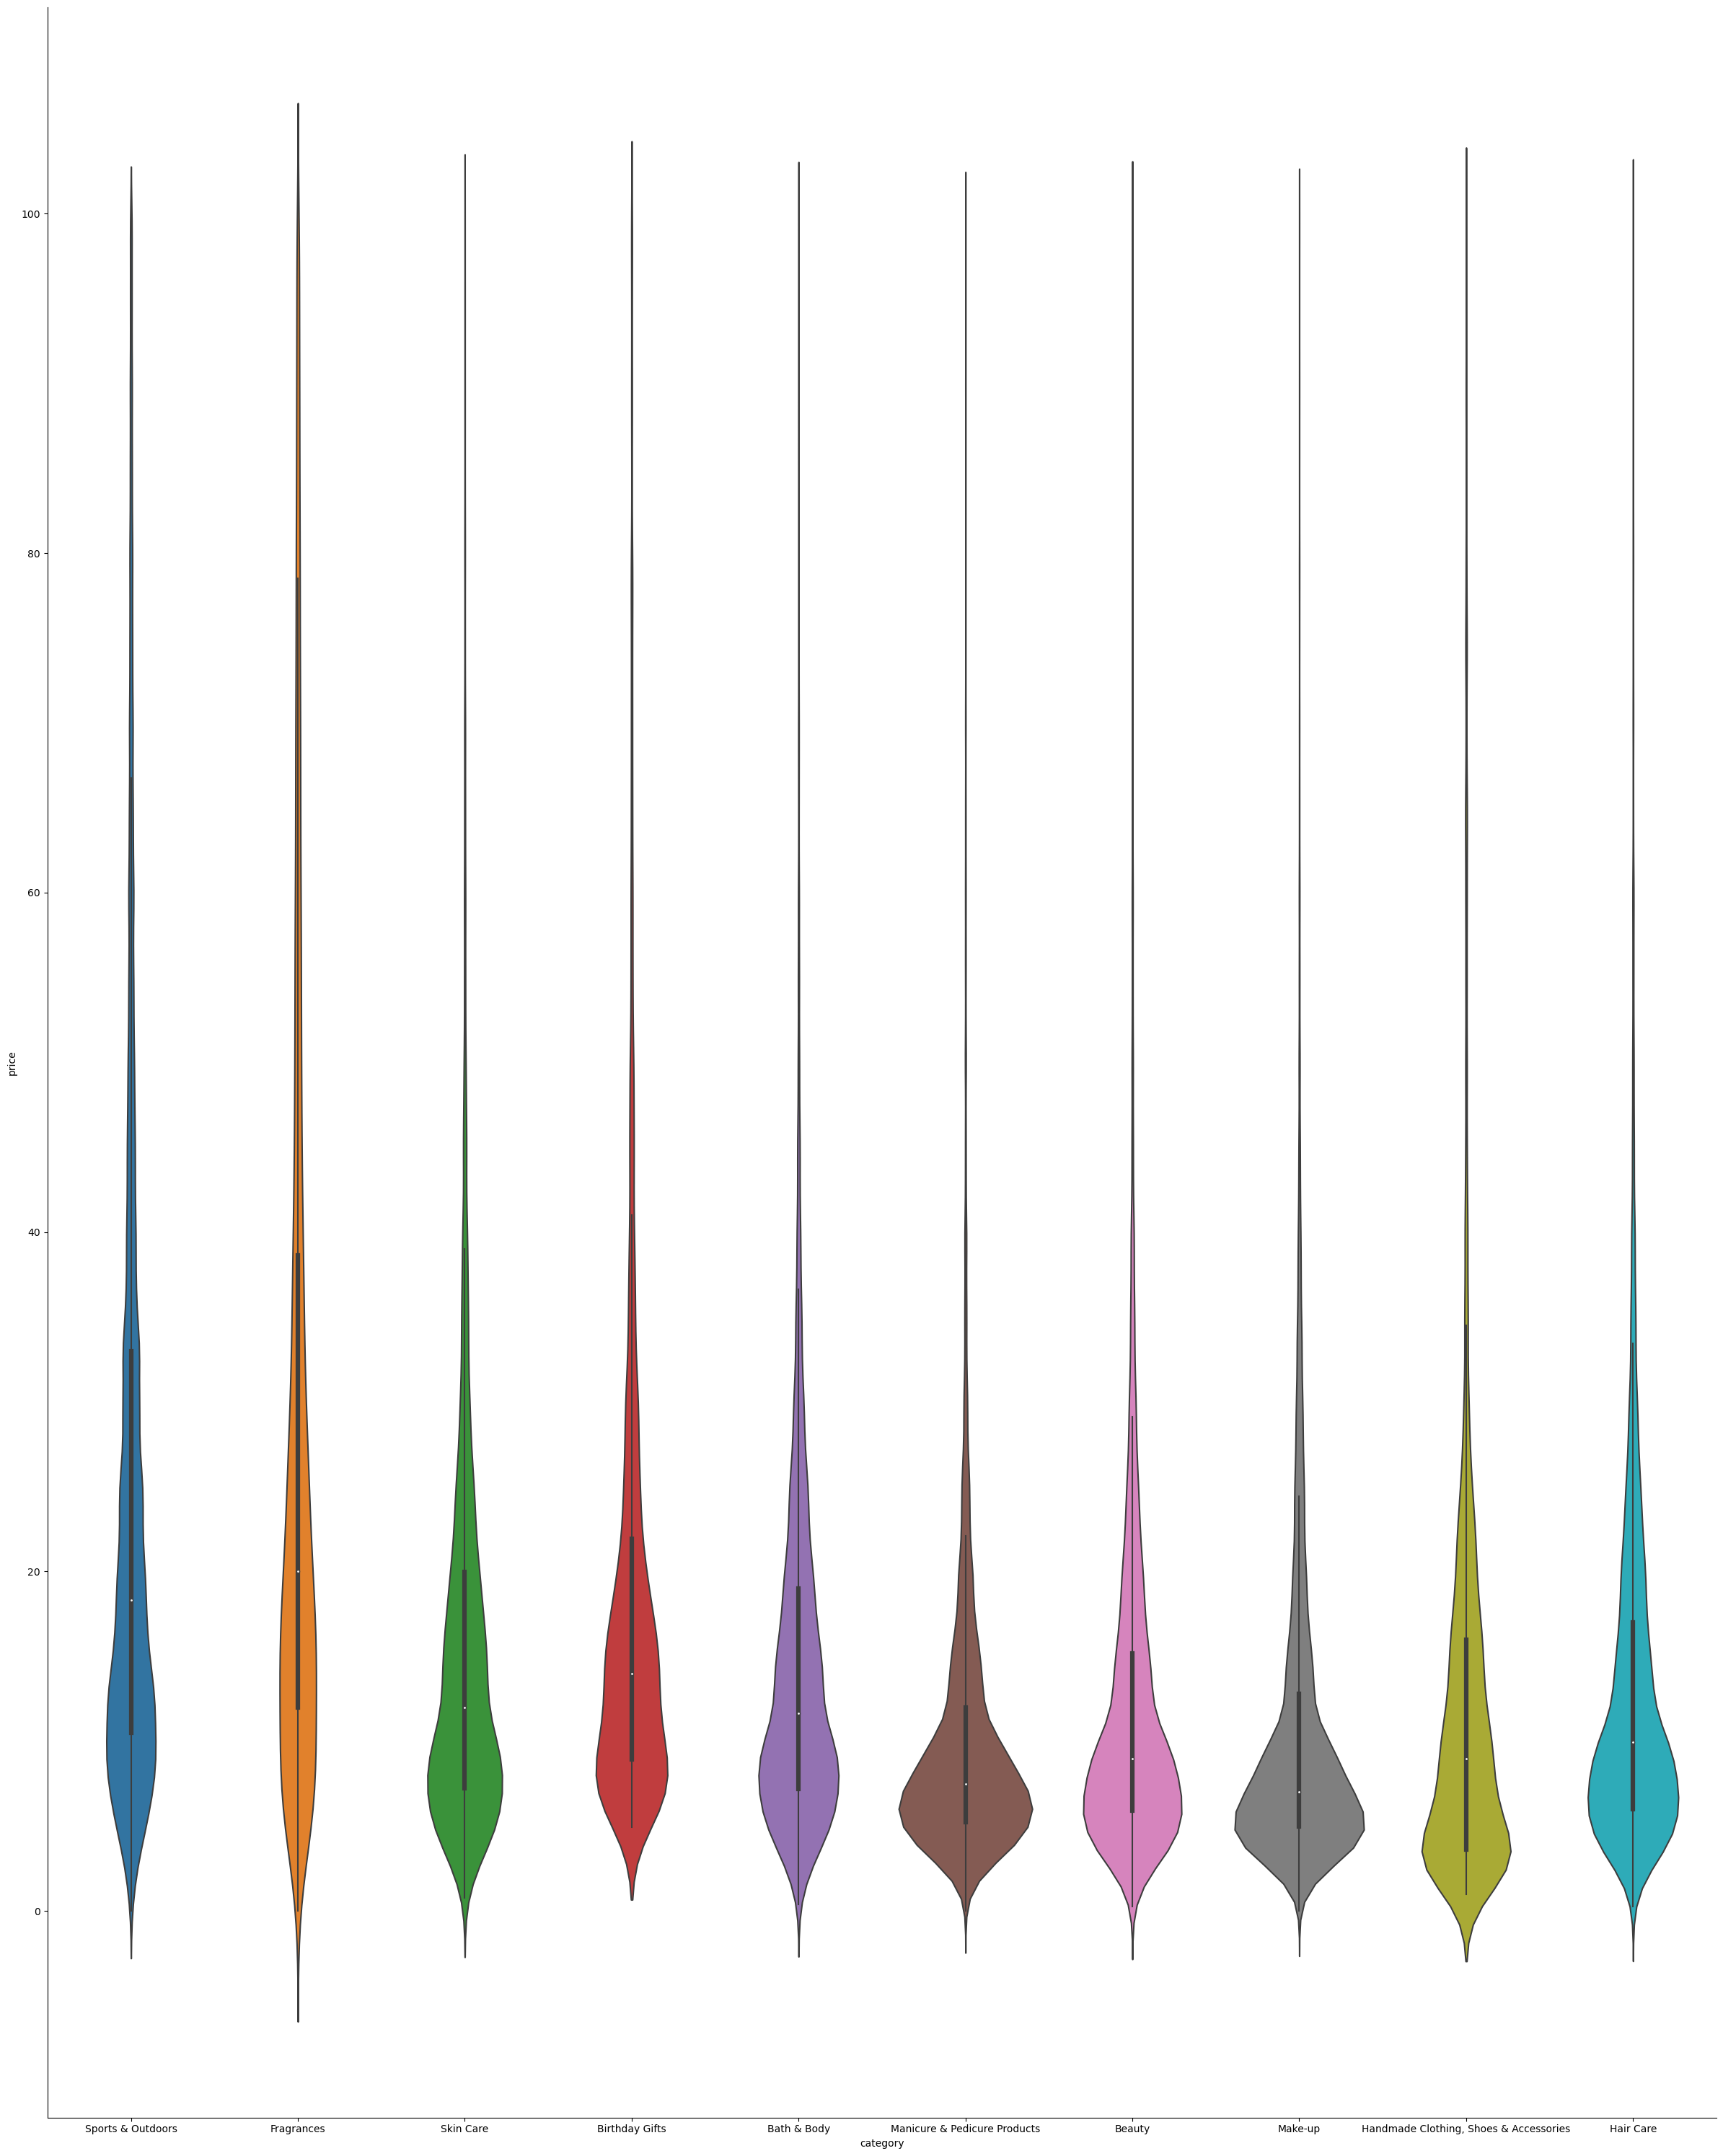

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=df_no_outliers.loc[df_no_outliers['category'].isin(filtered_categories)],x='category',y='price',kind='violin',height=30,
           aspect=0.8)

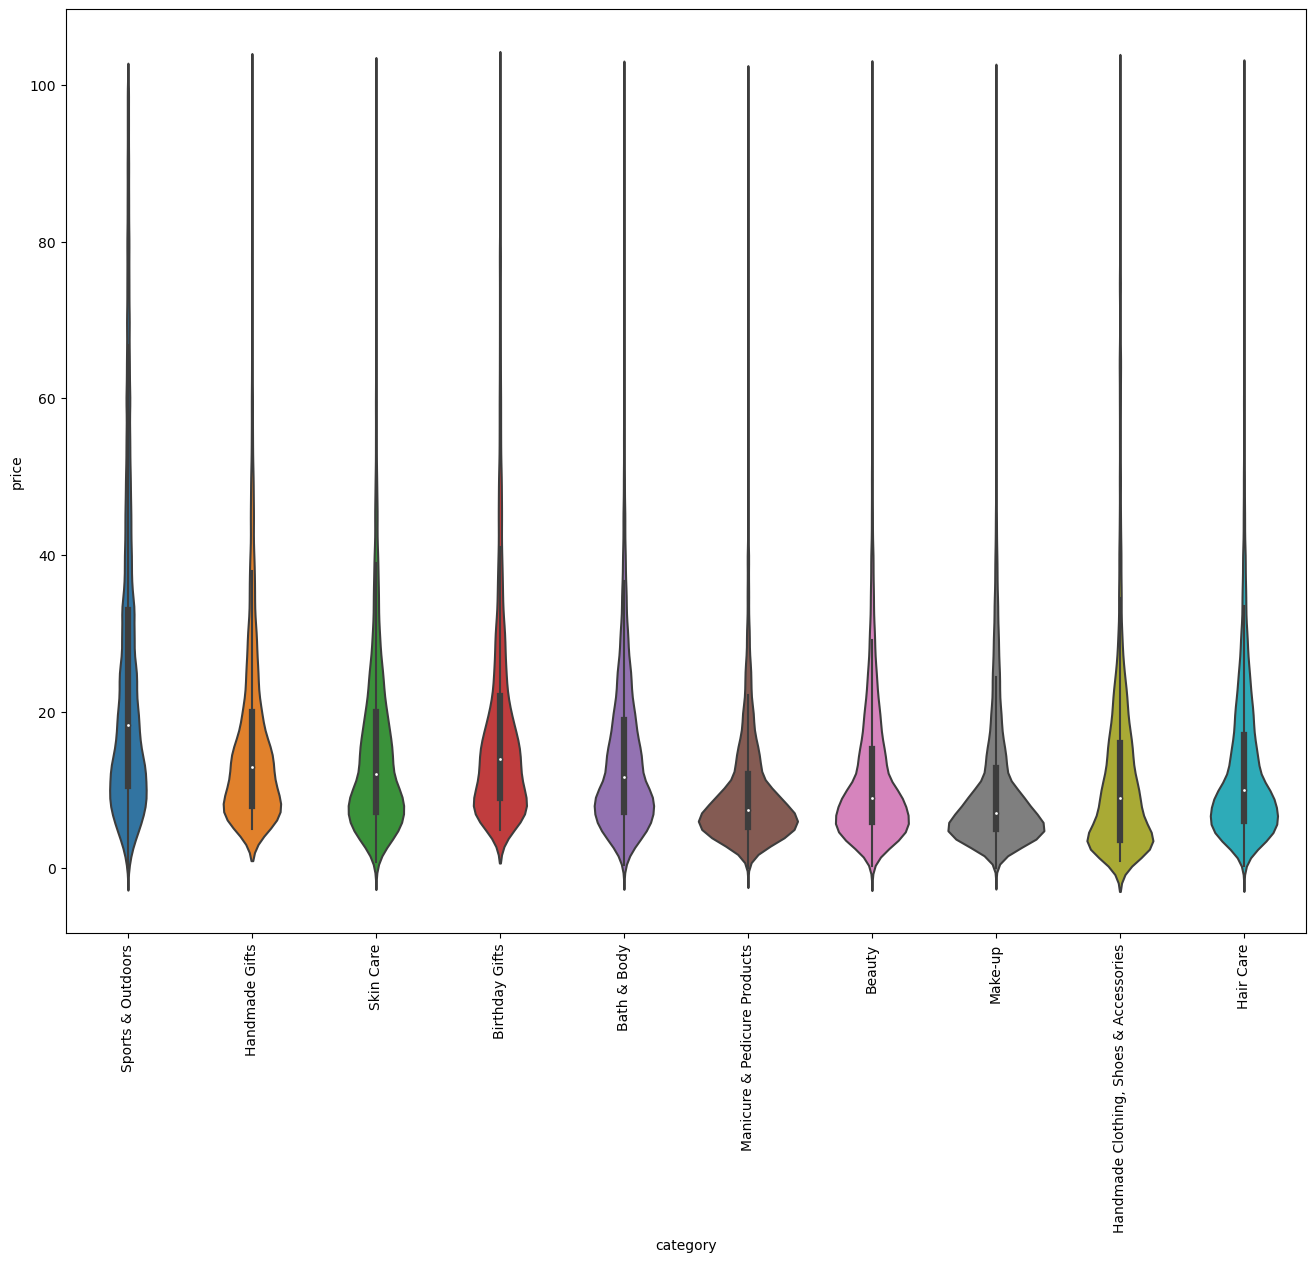

In [33]:
top_categories = df_no_outliers['category'].value_counts().head(10).index
df_filtered = df_no_outliers[df_no_outliers['category'].isin(top_categories)]

plt.figure(figsize=(16, 12))
sns.violinplot(x='category', y='price', data=df_filtered)
plt.xticks(rotation=90);

In [34]:
df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False).head(10)

category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64

In [35]:
df.groupby('category')['price'].median().sort_values(ascending=False).head(10)

category
Laptops                                1042.725
Desktop PCs                             810.400
Snowboards                              366.725
Home Audio Record Players               326.080
3D Printers                             319.000
Motorbike Exhaust & Exhaust Systems     313.830
Graphics Cards                          259.980
Snowboard Boots                         258.990
Lenses                                  249.990
Barebone PCs                            244.990
Name: price, dtype: float64

C:\Users\verus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


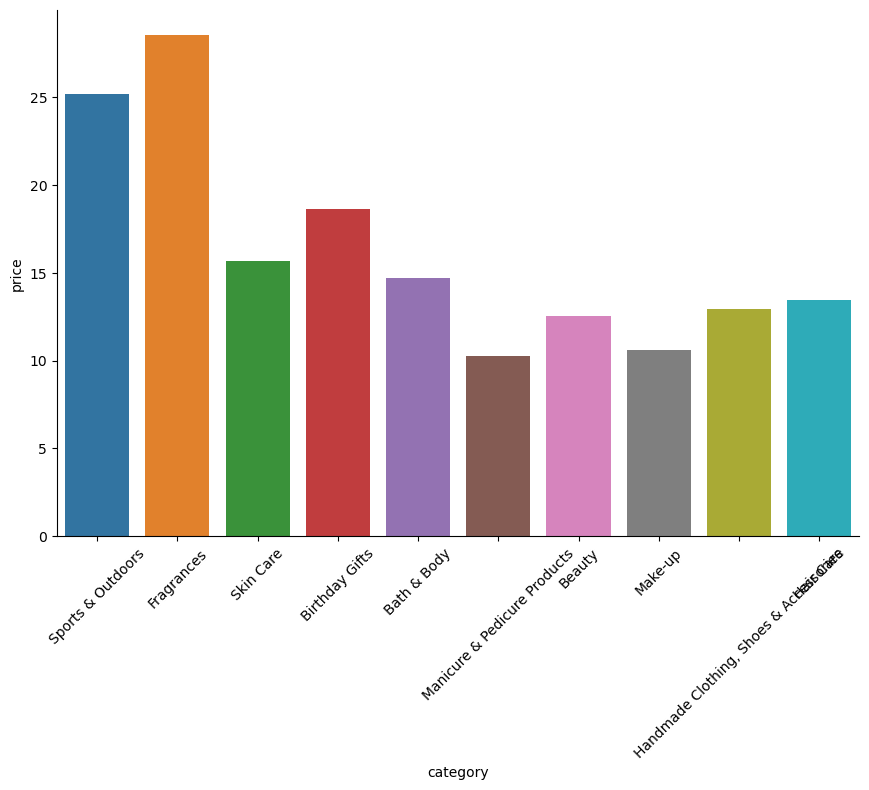

In [37]:
filtered_categories = df['category'].value_counts().head(10).index
filtered_categories
sns.catplot(data=df_no_outliers.loc[df_no_outliers['category'].isin(filtered_categories)],x='category',y='price',
            kind='bar',  height=6,  aspect=1.5,errorbar=None,)
plt.xticks(rotation=45);

In [38]:
df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

In [39]:
df.groupby('category')['price'].mean().sort_values(ascending=False)

category
Laptops                  1087.987827
3D Printers              1018.036129
Desktop PCs               926.816064
Home Office Furniture     622.135898
Test & Measurement        559.382973
                            ...     
Bedding Accessories         8.835220
Adapters                    8.750197
Signs & Plaques             8.275136
Arts & Crafts               8.182523
Office Paper Products       7.047684
Name: price, Length: 296, dtype: float64

C:\Users\verus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


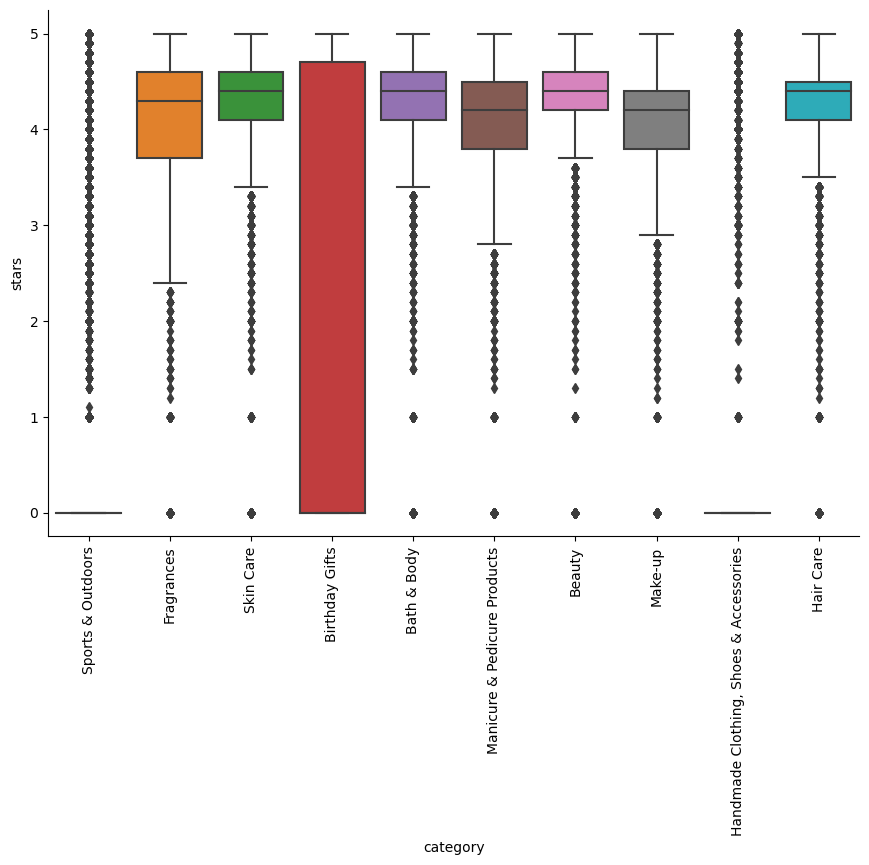

In [40]:
filtered_categories = df['category'].value_counts().head(10).index
filtered_categories
sns.catplot(data=df_no_outliers.loc[df_no_outliers['category'].isin(filtered_categories)],x='category',y='stars',
            kind='box',  height=6,  aspect=1.5)
plt.xticks(rotation=90);

C:\Users\verus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


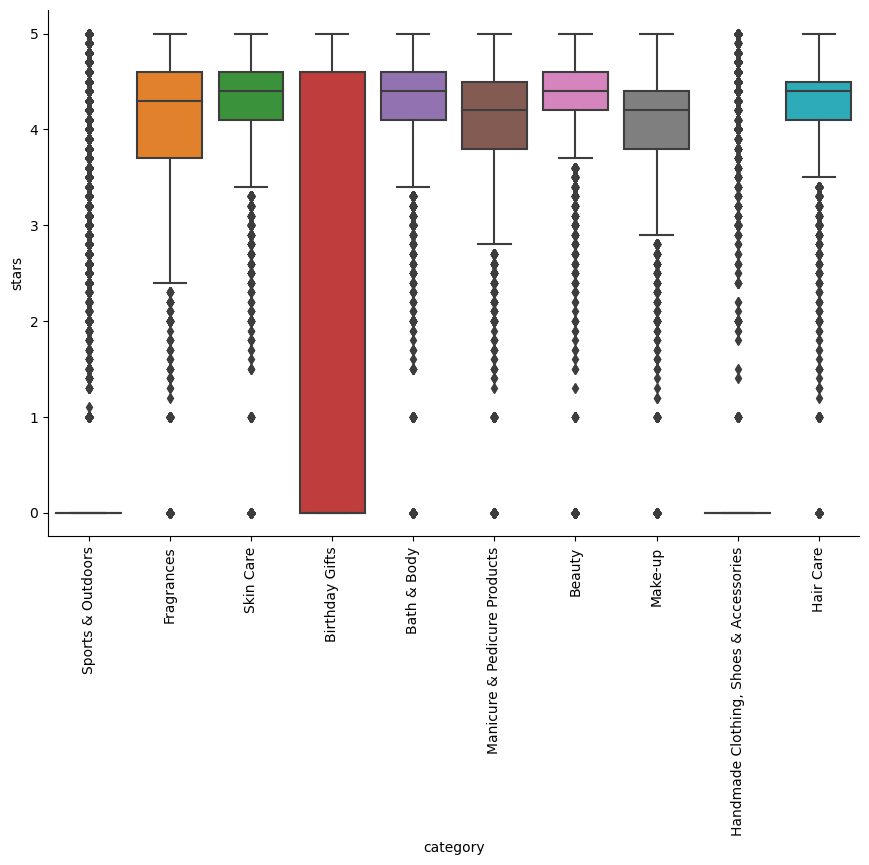

In [41]:
filtered_categories = df['category'].value_counts().head(10).index
filtered_categories
sns.catplot(data=df.loc[df['category'].isin(filtered_categories)],x='category',y='stars',
            kind='box',  height=6,  aspect=1.5)
plt.xticks(rotation=90);

In [42]:
df.groupby('category')['stars'].median().sort_values(ascending=False)

category
Computer Memory                4.7
Hobbies                        4.6
Beer, Wine & Spirits           4.6
Laptop Accessories             4.6
Kids' Play Figures             4.6
                              ... 
KVM Switches                   0.0
Karaoke Equipment              0.0
Lab & Scientific Products      0.0
Laptops                        0.0
eBook Readers & Accessories    0.0
Name: stars, Length: 296, dtype: float64

# Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?


In [43]:
df['price'].corr(df['stars'])

-0.1249067326214861

In [44]:
df[['price','stars']].corr()

,price,stars
price,1.000000,-0.124907
stars,-0.124907,1.000000


<Axes: xlabel='stars', ylabel='price'>

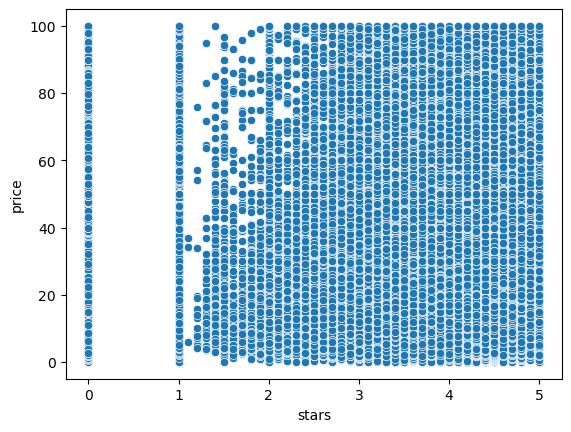

In [45]:
sns.scatterplot(data=df_no_outliers,x='stars',y='price')

<Axes: xlabel='stars', ylabel='price'>

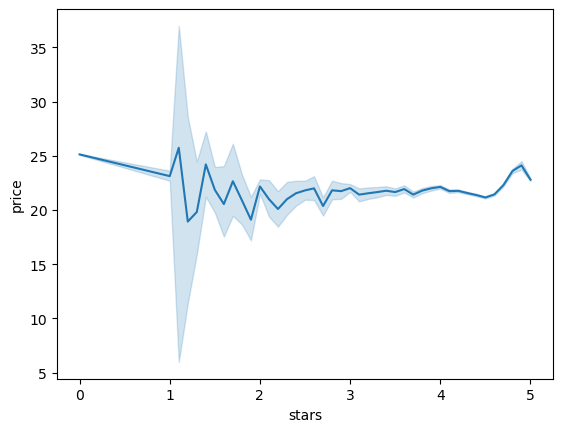

In [46]:
sns.lineplot(data=df_no_outliers,x='stars',y='price')

C:\Users\verus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


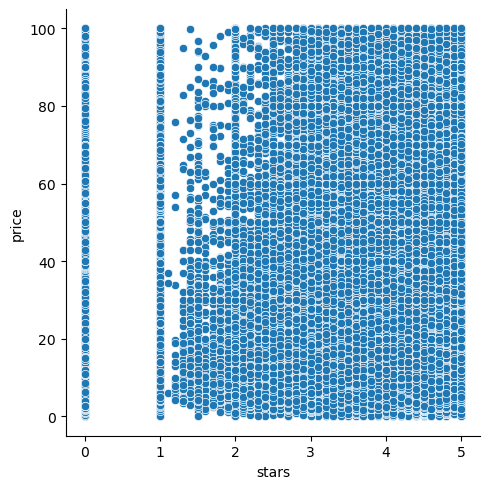

In [47]:
sns.relplot(data=df_no_outliers,x='stars',y='price',kind='scatter')

In [ ]:
sns.lmplot(data=df_no_outliers,x='stars',y='price')

C:\Users\verus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [ ]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True)

In [ ]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df_no_outliers['price'], line='s');